# Problem Statement:
# Perform EDA and derive Insights from the CAR DETAILS dataset using  Various Data Analysis and Data Visualizationlibraries of Python such as Pandas, Matplotlib & Seaborn. Create and Deploy a ML Model Which can be accessed by all, using Streamlit and GitHub.

Download the CAR DETAILS dataset and perform Data cleaning and Data Pre-Processing if Necessary.

In [5]:
import pandas as pd

# Loading the dataset
car_data = pd.read_csv("CAR_DETAILS.csv")

# Displaying the first few rows of the dataset
print(car_data.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [6]:
#Describing the data
print("Data Description : ")
print(car_data.describe())

# Displaying basic information about the dataset
print("Data Info : ")
print(car_data.info())

# Checking for duplicate rows
print(f"Duplicate rows: {car_data.duplicated().sum()}")

# Removing duplicate rows if any
car_data.drop_duplicates(inplace=True)

# Checking for missing values
print("Null values :")
print(car_data.isnull().sum())


Data Description : 
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000
Data Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null

 Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of Data Pre-Processing where
necessary.


In [7]:
# Imputing missing values with the median (for numerical) or most frequent value (for categorical)
from sklearn.impute import SimpleImputer

# Imputer for numerical columns
num_imputer = SimpleImputer(strategy='median')
car_data[['year', 'km_driven']] = num_imputer.fit_transform(car_data[['year', 'km_driven']])

# Imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
car_data[['fuel', 'seller_type', 'transmission', 'owner']] = cat_imputer.fit_transform(car_data[['fuel', 'seller_type', 'transmission', 'owner']])


In [9]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding categorical columns
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns)

print(car_data_encoded.head())


                       name    year  selling_price  km_driven  fuel_CNG  \
0             Maruti 800 AC  2007.0          60000    70000.0     False   
1  Maruti Wagon R LXI Minor  2007.0         135000    50000.0     False   
2      Hyundai Verna 1.6 SX  2012.0         600000   100000.0     False   
3    Datsun RediGO T Option  2017.0         250000    46000.0     False   
4     Honda Amaze VX i-DTEC  2014.0         450000   141000.0     False   

   fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Dealer  \
0        False          False     False         True               False   
1        False          False     False         True               False   
2         True          False     False        False               False   
3        False          False     False         True               False   
4         True          False     False        False               False   

   seller_type_Individual  seller_type_Trustmark Dealer  \
0                    True        

In [10]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical columns
scaler = StandardScaler()
car_data_encoded[['year', 'km_driven']] = scaler.fit_transform(car_data_encoded[['year', 'km_driven']])

print(car_data_encoded.head())



                       name      year  selling_price  km_driven  fuel_CNG  \
0             Maruti 800 AC -1.402566          60000   0.015754     False   
1  Maruti Wagon R LXI Minor -1.402566         135000  -0.404650     False   
2      Hyundai Verna 1.6 SX -0.226418         600000   0.646360     False   
3    Datsun RediGO T Option  0.949731         250000  -0.488731     False   
4     Honda Amaze VX i-DTEC  0.244042         450000   1.508188     False   

   fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Dealer  \
0        False          False     False         True               False   
1        False          False     False         True               False   
2         True          False     False        False               False   
3        False          False     False         True               False   
4         True          False     False        False               False   

   seller_type_Individual  seller_type_Trustmark Dealer  \
0                    

Perform Exploratory data analysis (EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with
conclusions from the Graphical Analysis

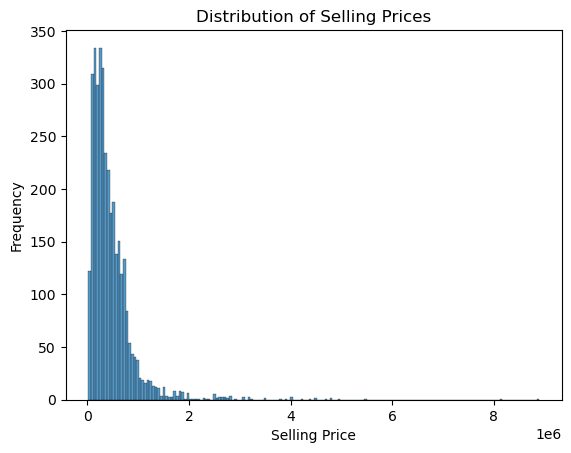

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(car_data['selling_price'])
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


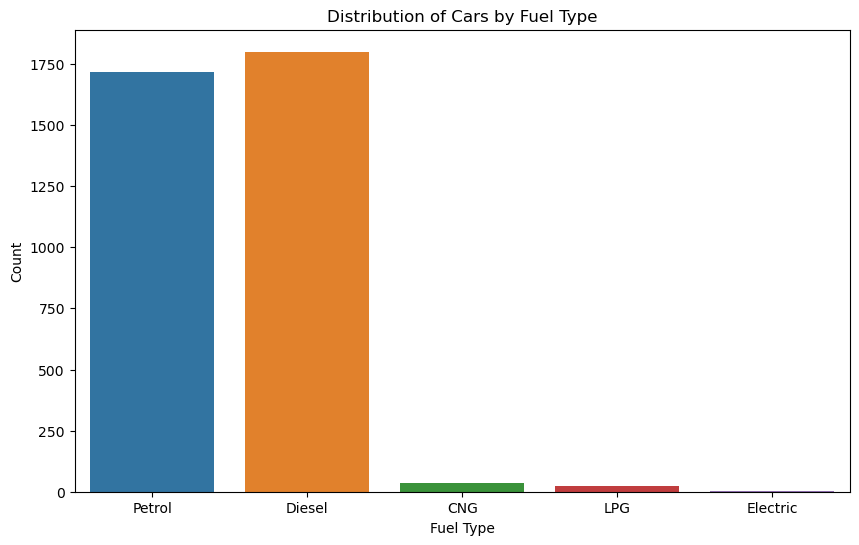

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', data=car_data)
plt.title('Distribution of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


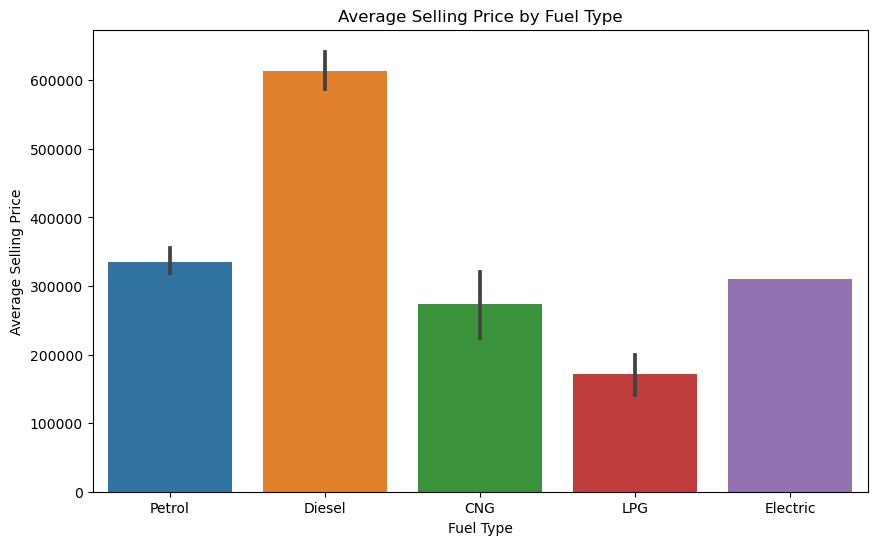

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='selling_price', data=car_data)
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()


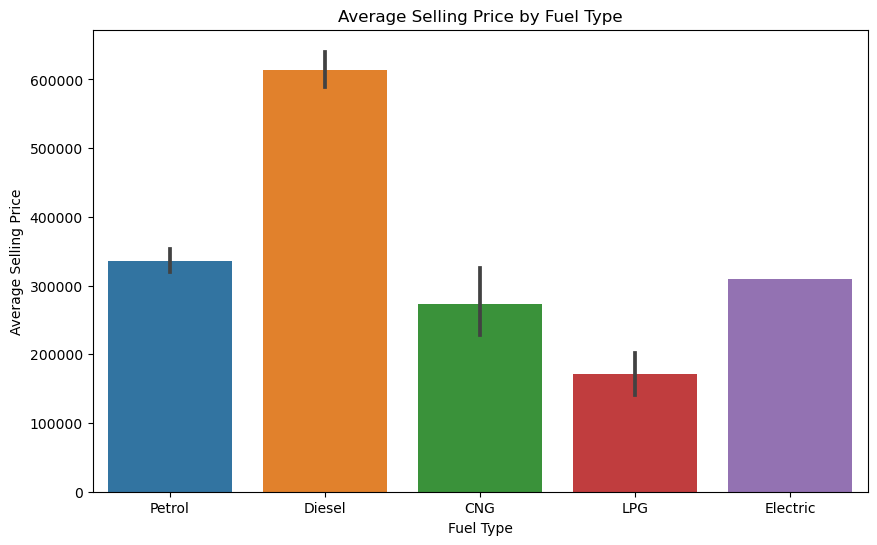

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='selling_price', data=car_data)
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()


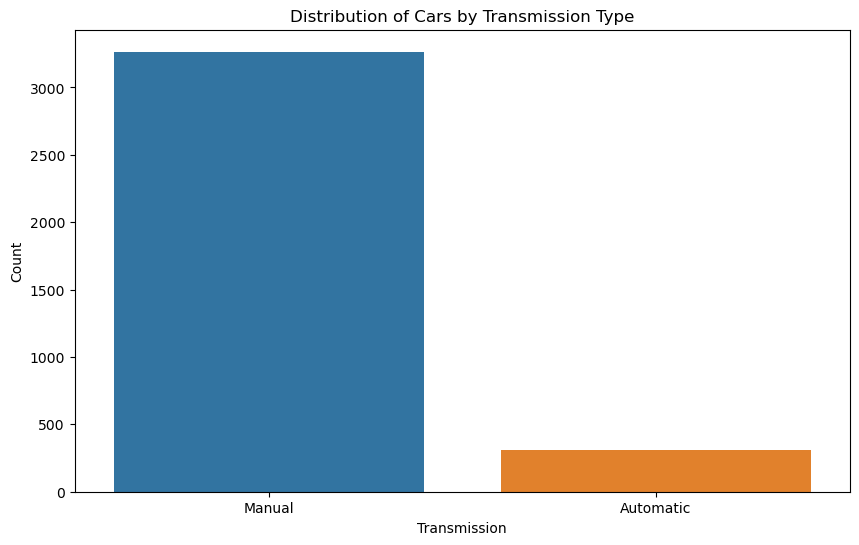

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=car_data)
plt.title('Distribution of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


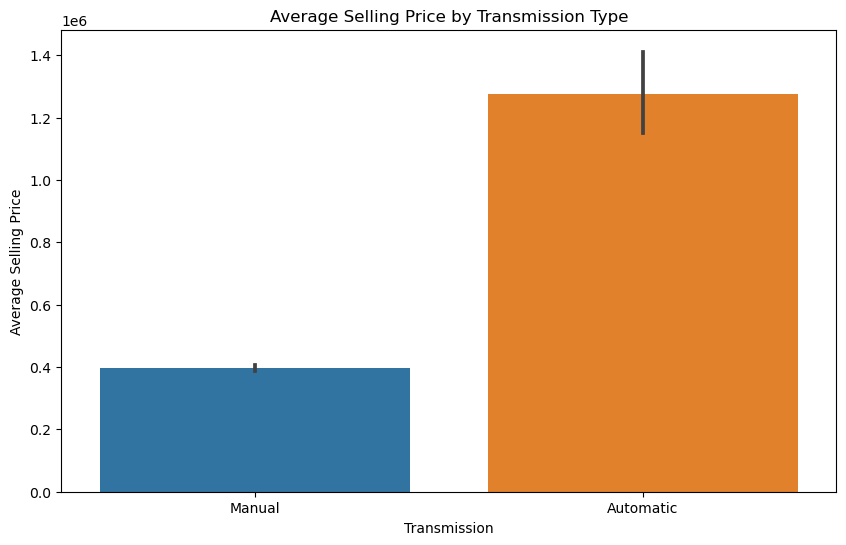

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='selling_price', data=car_data)
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.show()


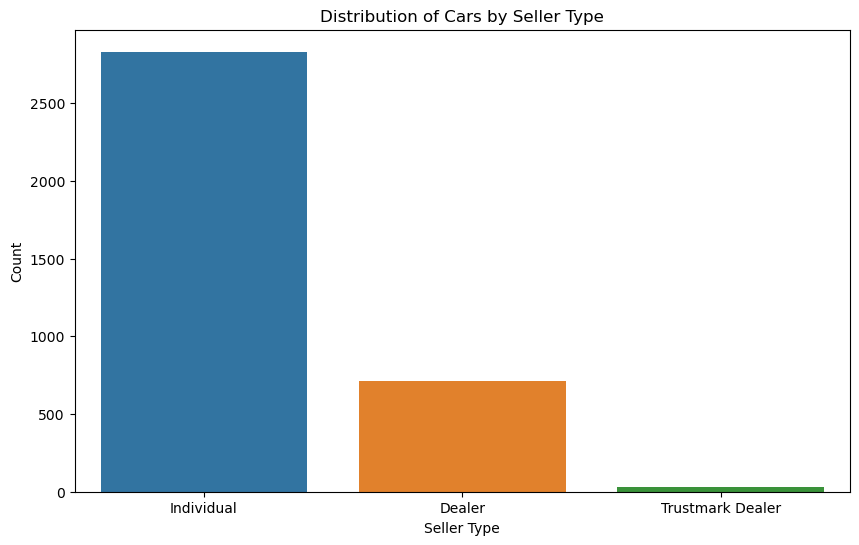

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='seller_type', data=car_data)
plt.title('Distribution of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()


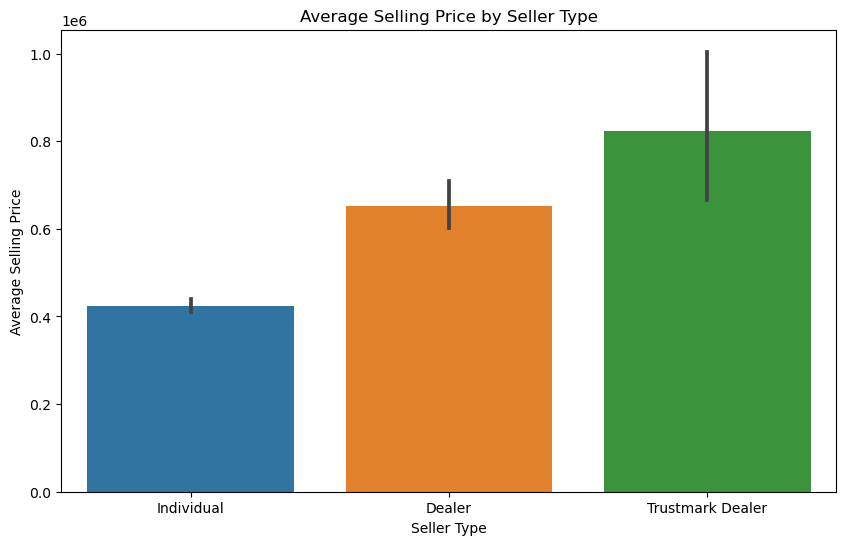

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y='selling_price', data=car_data)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()


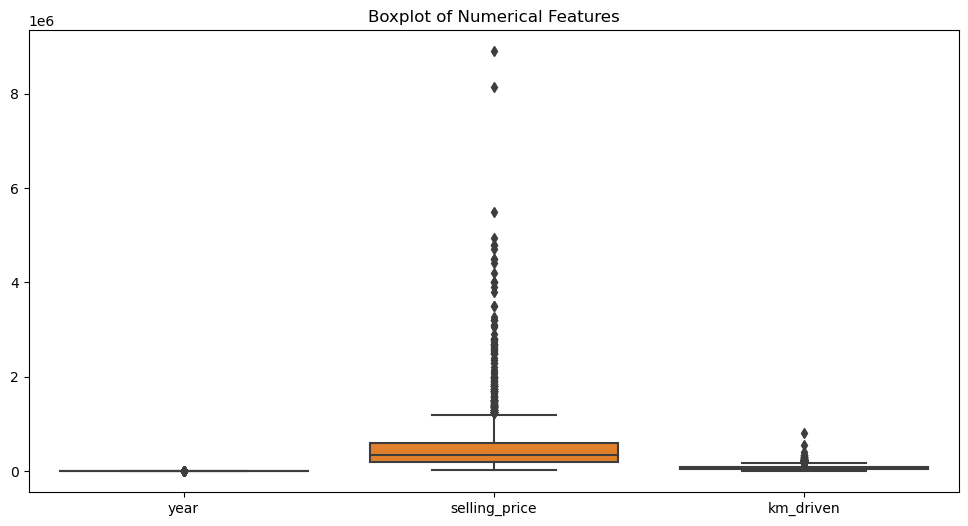

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data[['year', 'selling_price', 'km_driven']])
plt.title('Boxplot of Numerical Features')
plt.show()

Number of outliers in 'selling_price': 170


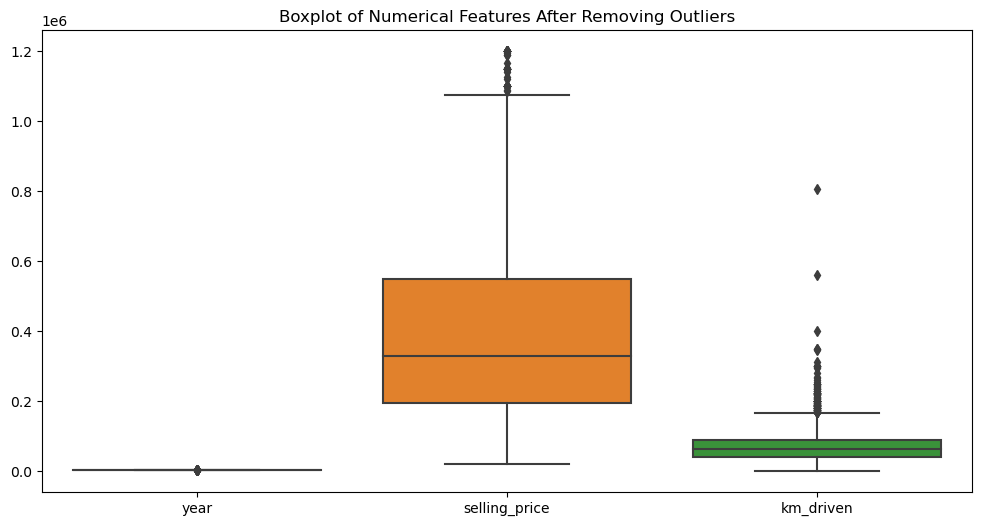

In [19]:
# Detecting outliers in 'selling_price'
Q1 = car_data['selling_price'].quantile(0.25)
Q3 = car_data['selling_price'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

# Defining the upper and lower bound
lower_bound = Q1 - outlier_threshold
upper_bound = Q3 + outlier_threshold

# Identifying outliers
outliers = car_data[(car_data['selling_price'] < lower_bound) | (car_data['selling_price'] > upper_bound)]

print(f"Number of outliers in 'selling_price': {outliers.shape[0]}")

# Removing outliers
car_data_cleaned = car_data[~((car_data['selling_price'] < lower_bound) | (car_data['selling_price'] > upper_bound))]

# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data_cleaned[['year', 'selling_price', 'km_driven']])
plt.title('Boxplot of Numerical Features After Removing Outliers')
plt.show()
